In [1]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

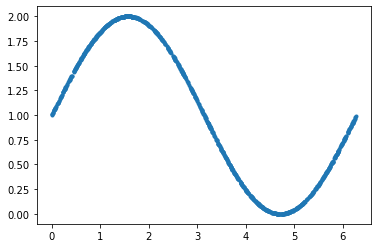

In [2]:
x_train = np.random.rand(1000)*2*3.14 
y_train = 1+np.sin(x_train)
plt.plot(x_train, y_train,'.')

In [3]:
x_train = x_train.reshape(len(x_train),1)
y_train = y_train.reshape(len(y_train),1)

In [ ]:
model = Sequential()
model.add(Dense(16, input_dim=1, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(8, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(4, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(2, activation='sigmoid', kernel_initializer='he_uniform'))
model.add(Dense(1))

In [5]:
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 2)                 10        
                                                                 
 dense_4 (Dense)             (None, 1)                 3         
                                                                 
Total params: 217
Trainable params: 217
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.fit(x_train, y_train, epochs=1000, batch_size=100, validation_split=.3, verbose=1)

Epoch 1/1000
7/7 [==============================] - 1s 84ms/step - loss: 10.3825 - val_loss: 7.0922
Epoch 2/1000
7/7 [==============================] - 0s 12ms/step - loss: 6.9108 - val_loss: 4.9145
Epoch 3/1000
7/7 [==============================] - 0s 13ms/step - loss: 4.7900 - val_loss: 3.3795
Epoch 4/1000
7/7 [==============================] - 0s 11ms/step - loss: 3.2670 - val_loss: 2.3908
Epoch 5/1000
7/7 [==============================] - 0s 24ms/step - loss: 2.3336 - val_loss: 1.8669
Epoch 6/1000
7/7 [==============================] - 0s 11ms/step - loss: 1.8159 - val_loss: 1.5781
Epoch 7/1000
7/7 [==============================] - 0s 10ms/step - loss: 1.5182 - val_loss: 1.4625
Epoch 8/1000
7/7 [==============================] - 0s 11ms/step - loss: 1.3871 - val_loss: 1.4160
Epoch 9/1000
7/7 [==============================] - 0s 14ms/step - loss: 1.3217 - val_loss: 1.3999
Epoch 10/1000
7/7 [==============================] - 0s 23ms/step - loss: 1.2918 - val_loss: 1.3946
Epoch 11

In [7]:
yhat = model.predict(x_train)

32/32 [==============================] - 0s 1ms/step


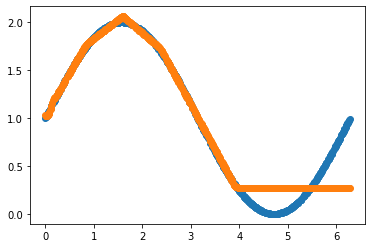

In [8]:
plt.scatter(x_train, y_train,  label='Actual')
plt.scatter(x_train,yhat, label='Predicted')

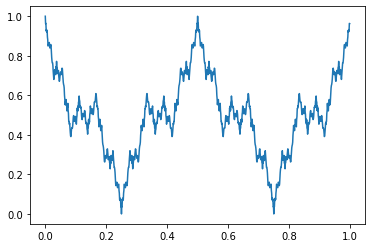

In [9]:
# Weiestrass continuous everywhere and differentiable nowhere function
# Credit: This function is implemented by Maria Efimova (found at "https://medium.com/@Melearning/weierstrass-function-in-python-6b1e6819df3a") 

Var = 1000
start=0
stop=1
x_train_weis = np.arange(start,stop,((stop-start)/Var))

a=1/2
b=3
def weierstrass(x,Ncoff):
    we=np.zeros(Var)
    for n in range(0,Ncoff):
        we=we+np.cos(b**n*np.pi*(4*x-2))*(a**n)
    return we

Ncoff=500
y_train_weis=(weierstrass(x_train_weis, Ncoff)+2)/4
plt.plot(x_train_weis,y_train_weis)
plt.show()


In [10]:
model_weis = Sequential()
model_weis.add(Dense(16, input_dim=1, activation='relu', kernel_initializer='he_uniform'))
model_weis.add(Dense(8, activation='relu', kernel_initializer='he_uniform'))
model_weis.add(Dense(4, activation='relu', kernel_initializer='he_uniform'))
model_weis.add(Dense(2, activation='sigmoid', kernel_initializer='he_uniform'))
model_weis.add(Dense(1))

In [11]:
model_weis.compile(loss='mse', optimizer='adam')
model_weis.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 16)                32        
                                                                 
 dense_6 (Dense)             (None, 8)                 136       
                                                                 
 dense_7 (Dense)             (None, 4)                 36        
                                                                 
 dense_8 (Dense)             (None, 2)                 10        
                                                                 
 dense_9 (Dense)             (None, 1)                 3         
                                                                 
Total params: 217
Trainable params: 217
Non-trainable params: 0
_________________________________________________________________


In [12]:
model_weis.fit(x_train_weis, y_train_weis, epochs=10000, batch_size=100, verbose=0)

In [13]:
yhat_weis = model_weis.predict(x_train_weis)

32/32 [==============================] - 0s 1ms/step


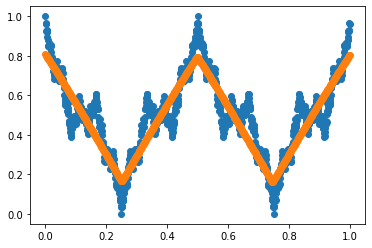

In [14]:
plt.scatter(x_train_weis, y_train_weis,  label='Actual')
plt.scatter(x_train_weis,yhat_weis, label='Predicted')

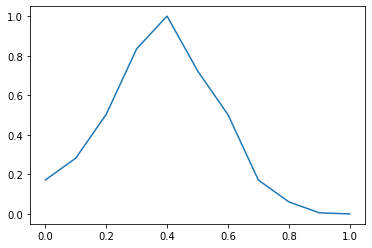

In [15]:
# Piece wice linear function
x_train_pl = np.linspace(0, 1, 1000)

y=[]
for i in x_train_pl:
    if i<0.1:
        y.append(2*i)
    elif i>0.1 and i<=0.2:
        y.append(4*(i-0.1)+0.2)
    elif i>0.2 and i<=0.3:
        y.append(6*(i-0.2)+0.6)
    elif i>0.3 and i<=0.4:
        y.append(3*(i-0.3)+1.2)
    elif i>0.4 and i<=0.5:
        y.append(-5*(i-0.4)+1.5)
    elif i>0.5 and i<=0.6:
        y.append(-4*(i-0.5)+1.0)
    elif i>0.6 and i<=0.7:
        y.append(-6*(i-0.6)+0.6)
    elif i>0.7 and i<=0.8:
        y.append(-2*(i-0.7))
    elif i>0.8 and i<=0.9:
        y.append(-1*(i-0.8)-0.2)
    else:
        y.append(-0.1*(i-0.9)-0.3)

y_train_pl=(y-np.min(y))/(np.max(y)-np.min(y))
plt.plot(x_train_pl,np.array(y_train_pl))
plt.show()


In [16]:
model_pl = Sequential()
model_pl.add(Dense(16, input_dim=1, activation='relu', kernel_initializer='he_uniform'))
model_pl.add(Dense(8, activation='relu', kernel_initializer='he_uniform'))
model_pl.add(Dense(4, activation='relu', kernel_initializer='he_uniform'))
model_pl.add(Dense(2, activation='sigmoid', kernel_initializer='he_uniform'))
model_pl.add(Dense(1))

In [17]:
model_pl.compile(loss='mse', optimizer='adam')
model_pl.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 16)                32        
                                                                 
 dense_11 (Dense)            (None, 8)                 136       
                                                                 
 dense_12 (Dense)            (None, 4)                 36        
                                                                 
 dense_13 (Dense)            (None, 2)                 10        
                                                                 
 dense_14 (Dense)            (None, 1)                 3         
                                                                 
Total params: 217
Trainable params: 217
Non-trainable params: 0
_________________________________________________________________


In [18]:
model_pl.fit(x_train_pl, y_train_pl, epochs=1000, batch_size=100, verbose=0)

In [19]:
yhat_pl = model_pl.predict(x_train_pl)

32/32 [==============================] - 0s 1ms/step


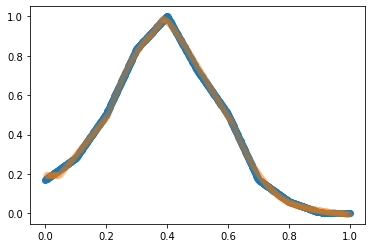

In [20]:
plt.scatter(x_train_pl, y_train_pl,  label='Actual')
plt.scatter(x_train_weis,yhat_pl, label='Predicted',alpha=0.05)

In [21]:
# Classification function

x=  np.random.rand(1000)
x_train_cls =(x-np.min(x))/(np.max(x)-np.min(x))
y=[]
for i in x_train_cls:
    if i<0.1:
        y.append([1,0,0])
    elif i>0.1 and i<=0.2:
        y.append([0,1,0])
    elif i>0.2 and i<=0.3:
        y.append([0,0,1])
    elif i>0.3 and i<=0.4:
        y.append([0,1,0])
    elif i>0.4 and i<=0.5:
        y.append([0,0,1])
    elif i>0.5 and i<=0.6:
        y.append([1,0,0])
    elif i>0.6 and i<=0.7:
        y.append([1,0,0])
    elif i>0.7 and i<=0.8:
        y.append([0,0,1])
    elif i>0.8 and i<=0.9:
        y.append([0,1,0])
    else:
        y.append([1,0,0])
y_train_cls=np.array(y)


In [22]:
model_cls = Sequential()
model_cls.add(Dense(16, input_dim=1, activation='relu'))
model_cls.add(Dense(12, activation='relu'))
model_cls.add(Dense(8, activation='relu'))
model_cls.add(Dense(6, activation='sigmoid'))
model_cls.add(Dense(3, activation='sigmoid'))

In [23]:
model_cls.compile(loss='mse', optimizer='adam')
model_cls.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 16)                32        
                                                                 
 dense_16 (Dense)            (None, 12)                204       
                                                                 
 dense_17 (Dense)            (None, 8)                 104       
                                                                 
 dense_18 (Dense)            (None, 6)                 54        
                                                                 
 dense_19 (Dense)            (None, 3)                 21        
                                                                 
Total params: 415
Trainable params: 415
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_cls.fit(x_train_cls, y_train_cls, epochs=10000, batch_size=100, verbose=0)

In [ ]:
yhat_cls = model_cls.predict(x_train_cls)

32/32 [==============================] - 0s 1ms/step


<ipython-input-26-f26b0ff6f245>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  cls=np.array(cls)


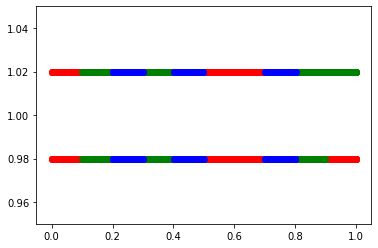

In [ ]:
cls1=x_train_cls[y_train_cls[:,0]==1]
plt.scatter(cls1,np.zeros_like(cls1) + 0.98,color='r',  label='Actual')
cls2=x_train_cls[y_train_cls[:,1]==1]
plt.scatter(cls2,np.zeros_like(cls2) + 0.98,color='g',  label='Actual')
cls3=x_train_cls[y_train_cls[:,2]==1]
plt.scatter(cls3,np.zeros_like(cls3) + 0.98,color='b',  label='Actual')

cls=[[]]*3
for i,yi in enumerate(yhat_cls):
  idx=np.argmax(yi)
  cls[idx]=cls[idx]+[x_train_cls[i]]
cls=np.array(cls)
plt.scatter(cls[0],np.zeros_like(cls[0]) + 1.02,color='r',  label='predicted')
plt.scatter(cls[1],np.zeros_like(cls[1]) + 1.02,color='g',  label='predicted')
plt.scatter(cls[2],np.zeros_like(cls[2]) + 1.02,color='b',  label='predicted')
plt.ylim(0.95,1.05)
plt.show()


0
32/32 [==============================] - 0s 1ms/step - loss: 0.0757
1
32/32 [==============================] - 0s 1ms/step - loss: 3.4100e-04
2
32/32 [==============================] - 0s 1ms/step - loss: 2.0348e-04
3
32/32 [==============================] - 0s 1ms/step - loss: 1.9530e-04
4
32/32 [==============================] - 0s 1ms/step - loss: 1.9226e-04
5
32/32 [==============================] - 0s 1ms/step - loss: 2.2031e-04
6
32/32 [==============================] - 0s 1ms/step - loss: 1.7538e-04
7
32/32 [==============================] - 0s 1ms/step - loss: 2.0863e-04
8
32/32 [==============================] - 0s 1ms/step - loss: 2.0167e-04
9
32/32 [==============================] - 0s 1ms/step - loss: 2.0641e-04
10
32/32 [==============================] - 0s 1ms/step - loss: 2.0342e-04
11
32/32 [==============================] - 0s 1ms/step - loss: 1.8928e-04
12
32/32 [==============================] - 0s 1ms/step - loss: 2.0777e-04
13
32/32 [=============================

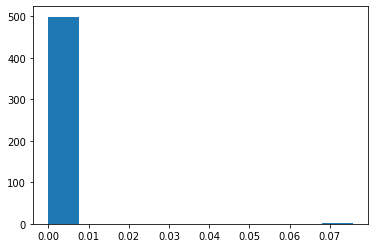

In [ ]:
model_pl2 = Sequential()
model_pl2.add(Dense(16, input_dim=1, activation='relu', kernel_initializer='he_uniform'))
model_pl2.add(Dense(8, activation='relu', kernel_initializer='he_uniform'))
model_pl2.add(Dense(4, activation='relu', kernel_initializer='he_uniform'))
model_pl2.add(Dense(2, activation='sigmoid', kernel_initializer='he_uniform'))
model_pl2.add(Dense(1))



num_of_exp=500
Err=np.zeros(num_of_exp)
for tr in range(num_of_exp):
    print(tr)
    x_train_pl2 = np.random.rand(1000)
    y=[]
    for i in x_train_pl2:
        if i<0.1:
            y.append(2*i)
        elif i>0.1 and i<=0.2:
            y.append(4*(i-0.1)+0.2)
        elif i>0.2 and i<=0.3:
            y.append(6*(i-0.2)+0.6)
        elif i>0.3 and i<=0.4:
            y.append(3*(i-0.3)+1.2)
        elif i>0.4 and i<=0.5:
            y.append(-5*(i-0.4)+1.5)
        elif i>0.5 and i<=0.6:
            y.append(-4*(i-0.5)+1.0)
        elif i>0.6 and i<=0.7:
            y.append(-6*(i-0.6)+0.6)
        elif i>0.7 and i<=0.8:
            y.append(-2*(i-0.7))
        elif i>0.8 and i<=0.9:
            y.append(-1*(i-0.8)-0.2)
        else:
            y.append(-0.1*(i-0.9)-0.3)

    y_train_pl2=(y-np.min(y))/(np.max(y)-np.min(y))
    model_pl2.compile(loss='mse', optimizer='adam')
    model_pl2.fit(x_train_pl2, y_train_pl2, epochs=100, batch_size=100, verbose=0)
    Err[tr]=model_pl2.evaluate(x_train_pl2,  y_train_pl2)

plt.hist(Err)
plt.show()

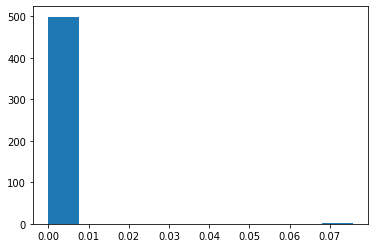

In [ ]:
plt.hist(Err)
plt.show()